## Práctica #3

**Profesor**: Luis Norberto Zúñiga Morales, Universidad Iberoamericana Ciudad de México

*Inspirado en el libro [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).*

**Objetivos**:
- Introducir la API de Keras a los estudiantes para la implementación de redes neuronales convolucionales mediante Tensorflow.
- Implementar ideas básicas de una red neuronal convolucional mediante un ejemplo práctico de clasificación usando el dataset MNIST.

**Instrucciones**: 
- Realizar cada una de las actividades propuestas en este libro de Google Colab.
- Se puede realizar en equipos de 2 personas.
- Para la entrega de sus respuestas, es importante que todas las celdas en cuestión se encuentren ejecutadas para mostrar y evaluar sus resultados.
- Descargar su libro con terminación IPYNB y cargarlo en la actividad correspondiente en Brigthspace.

In [ ]:
print('Nombre 1')
print('Nombre 2')

### Convolución en Acción

En Tensorflow, una imagen se representa como un tensor en 3D con una forma [alto, ancho, # canales].
- Un mini-batch se representa como un tensor 4D de forma [tamaño del mini-batch, alto, ancho, # canales].
- Los pesos de una capa convolucional se representan como un tensor 4D con forma [$f_h$, $f_w$, $f_n$, $f_n$].
- Los terminos del bias de una capa convolucional se representan como un tensor 1D de forma [$f_n$].

El siguiente ejemplo carga unas imágenes precargadas 

In [16]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])

In [10]:
# escribir aqui su codigo para que muestre las imagenes y puedan verlas antes de aplicar los filtros

In [11]:
batch_size, height, width, channels = images.shape

In [14]:
# escribir su codigo para imprimir las variables anteriores para visualizar el valor de cada una de ellas

In [13]:
# creamos dos filtros
filters = np.zeros(shape=(7,7, channels, 2), dtype = np.float32) #flitros de 7 x 7 x # de canales x # de filtros
filters[:, 3, :, 0] = 1 # linea vertical 
filters[3, :, :, 1] = 1 # linea horizontal

- *images* es el mini-batch (un tensor 4D)
- *filters* sons los filtros que van a aplicar
- Se aplican ambos filtros usando `tf.nn.conv2d()`, con cero padding y paso de 1.

In [17]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')

In [ ]:
plt.imshow(outputs[0, :, :, 1], cmap = 'gray') # graficar primera imagen aplicada segundo mapa de caracteristicas
plt.show()

### MNIST con Capas Convolucionales



In [ ]:
import random
import pandas as pd

En primer lugar, vamos a revisar las versiones de nuestras librerías principales.

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

Keras provee algunas funciones de utilidad para descargar y cargar conjuntos de datos comunes. En este caso, vamos a utilizar el dataset llamado MNIST. Vamos a cargarlo:

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Visualización de los datos

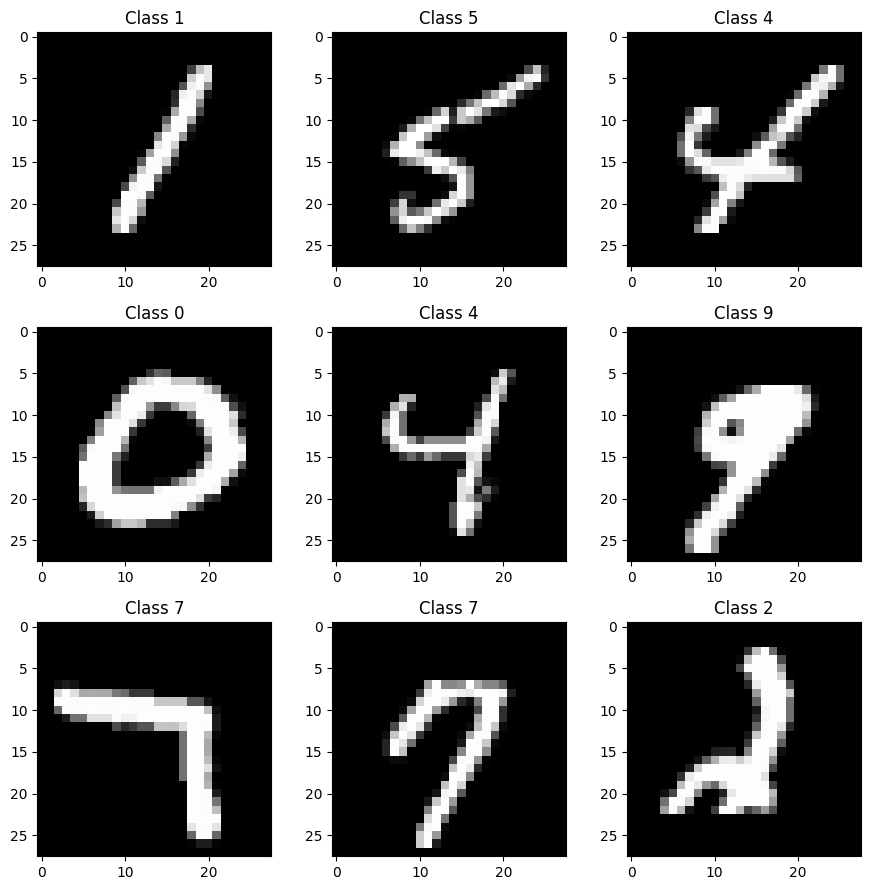

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

A diferencia de Scikit Learn, Keras representa las imágenes como un arreglo. En este caso, son imágenes de tamaño 28x28. Además, la intensidad de cada pixel se representa como enteros entre 0 y 255.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

### Preparando los datos para su entrenamiento

Se carga el dataset en las variables de entrenamiento y prueba. Además, vamos a considerar un conjunto de validación para evaluar finalmente la red neuronal. 

Por otro lado, debemos normalizar los valores de la matriz (que van de 0 a 255) para que solo sean valores entres 0 y 1. Por esto, dividimos entre 255. Con esto, adicionalmente, los valores pasan a ser de punto flotante.

In [ ]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

### Construcción y entrenamiento de la red neuronal convolucional

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]), # 64 filtros de tamaño 7x7
    keras.layers.MaxPooling2D(2), #maxpool de tamaño 2x2 con salto de 2, divide cada dimensión espacial en dos
    keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'), # misma estructura que se repite dos veces
    keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'), # el número de capas es un hiperparámetros por ajustar
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'), # el número de filtros aumenta para capturar características más complejas
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'), # perceptron multicapa para clasificar
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [ ]:
model.summary()

Usualmente, los valores de los pesos iniciales se eligen de forma aleatoria y el valor del bias se inicializa en 0. Sin embargo, esto trae consigo ciertos problemas...

Después de crear el modelo, debemos compilarlo con el método `compile()`, el cual permite especificar la función de pérdida y el optimizador, además de otras métricas a calcular durante el entrenamiento y evaluación.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

### Evaluación del modelo obtenido y predicciones para datos que no ha visto antes

Para realizar la evaluación final del modelo se utilizar el método `evaluate()` pasando como argumentos `X_test` y `y_test`.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.9677 - accuracy: 0.9724


[13.967702865600586, 0.9724000096321106]

Igual que Scikit Learn, es posible predecir las etiquetas del conjunto de prueba. Noten que regresa un arreglo con todas las predicciones.

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


¿Cómo se ve la predicción? Es un arreglo de (en este caso) 10 clases, donde a cada entrada se le asigna un valor de 'probabilidad'. Para determinar el valor final de la clase, se considera el más alto entre todos ellos.

In [ ]:
predictions[56]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[56])

4

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

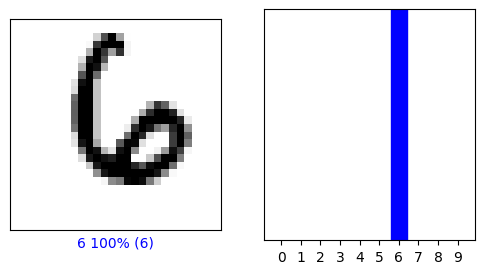

In [ ]:
i = 88
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

## Actividad 1

Revisar la documentación en Keras/Tensorflow sobre las capas convolucionales 2D y el pooling. Realizar un pequeño resumen sobre los argumentos que se utilizaron al momento de construir la arquitectura de la red neuronal convolucional anterior.

## Actividad 2

1. Construir un perceptrón multicapa (*feedforward neural network*) para clasificar las imágenes de MNIST con la siguiente arquitectura:
- una capa de entrada Flatten de tamaño [28,28]
- dos capas ocultas, la primera con 300 neuronas y al segunda con 100 neuronas, ambas con función de activación ReLU
- una capa de salida con 10 neuronas y función de activación softmax
- ya que es un problema de clasificación, como función de pérdida se utiliza *categorical cross entropy* y como algoritmo de optimización usen gradiente descendiente estocástico.
- utilizar early stoping para evitar sobreajuste.

Comparar el desempeño de esta red neuronal con la de este programa mediante las métricas de evaluación y el historial de entrenamiento. ¿Por qué creen que una es mejor que la otra?

2. Agreguen dropout a la red con un valor de 0.2. ¿Mejora en algo el desempeño del perceptrón anterior?